# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
# Data types and information
# we can see the Dtype of each column with providing that the Memory usage is around 3+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
# We have 12317 rows and 32 columns
df.shape

(12316, 32)

In [5]:
# we can see the first 5 rows of the dataset
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
# firstly we can see that the numerical columns is just 2 columns and we can see the mean & std of each column
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
# As we can see, there is no duplicated row
df.duplicated().sum()

0

In [8]:
# we can see from the below that the missing value of each column is a lot and we need to handle it
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [9]:
# Handling missing values
# First we can see that there is columns with 1000+ missing values and we will drop their columns

# Drop the columns with 1000+ missing values
drop_missing_values_columns = df.isnull().sum() > 1000
drop_missing_values_columns = drop_missing_values_columns[drop_missing_values_columns].index
df = df.drop(columns=drop_missing_values_columns,axis=1)

# Creating a mask for more than 1 missing value in the column and make the index to get the column names
hadnle_missing_values_columns = df.isnull().sum() > 0
hadnle_missing_values_columns = hadnle_missing_values_columns[hadnle_missing_values_columns].index

# filling depend on the previous row
for i in hadnle_missing_values_columns:
    df[i] = df[i].fillna(method='ffill')
    
# drop any row with missing value due to having the previous row missing value
df = df.dropna()

/var/folders/c1/9m9gfrj553l8956nyk7q8gw40000gn/T/ipykernel_41981/657451934.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[i] = df[i].fillna(method='ffill')


In [10]:
# Check for any inconsistency in the data

for i in df.columns:
    print(f"This is column name {i}")
    print(f"{df[i].unique()}\n")

# Change the time from category to datetime type
# df['Time'] = pd.to_datetime(df['Time'])
# it's commented due to cannot be used in ML if it's working due to the type of the column, so I will make it to be a category
# but if it's used in visualization it's better to be datetime

# Although it's going to create all the time in one day, but we want to use it for the time itself not the day. we can include column
# *Day_of_week* to include the day of the week in the visualization and analysis



This is column name Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

This is column name Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

This is column name Age_band_of_driver
['31-50' '18-30' 'Under 18' 'Over 51' 'Unknown']

This is column name Sex_of_driver
['Male' 'Female' 'Unknown']

This is column name Educational_level
['Junior high school' 'Above high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

This is column name Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' 'Other']

This is column name Driving_experience
['Above 10yr' '1-2yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']

This is column name Type_of_vehicle
['Public (> 45 seats)' 'Lorry (41?100Q)' 'Automobile'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']


In [11]:
# I will use One-Hot Encoding to convert the categorical columns for the ML model but not right now because I want the catagorical columns in Data Visualization and ease to implement the code.

In [12]:
# Use Standard Scaler on the numerical columns to make it around 0 mean and 1 standard deviation to normalize the distribution
ss = StandardScaler()
df[['Number_of_vehicles_involved','Number_of_casualties']] = ss.fit_transform(df[['Number_of_vehicles_involved','Number_of_casualties']])

In [13]:
### Define IQR function to remove the outliers from the data
### Even thought the standard scaler help in that position but I want to make sure to use IQR to remove the outliers
### Creating the function to remove outliers of the column then use it on the two numerical columns

### After using it and see the result I will not use it becuase the data of the two columns is not normally distributed and the IQR will remove a lot of the data

def remove_outliers(df,column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column_name] >= (Q1 - 1.5 * IQR)) & (df[column_name] <= (Q3 + 1.5 * IQR))]

# df = remove_outliers(df,'Number_of_vehicles_involved')
# df = remove_outliers(df,'Number_of_casualties')



In [14]:
# Feature Engineering
# we already did the transformation in the Time column and Standard Scaler in the numerical columns
# For the One-Hot Encoding, I will use it later in the ML model


# Feature Creating
# Creating a feature that could result in a better model performance and a better understanding of the data
df['Ratio_vehicles_casualties'] = df['Number_of_vehicles_involved'] / df['Number_of_casualties']

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

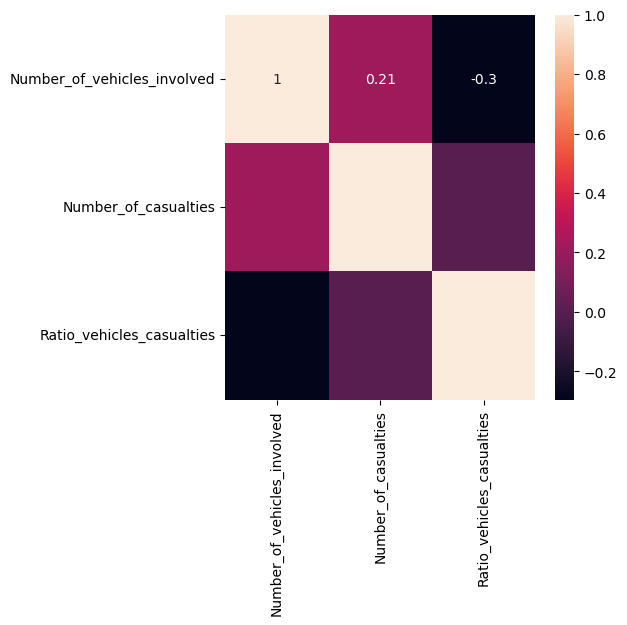

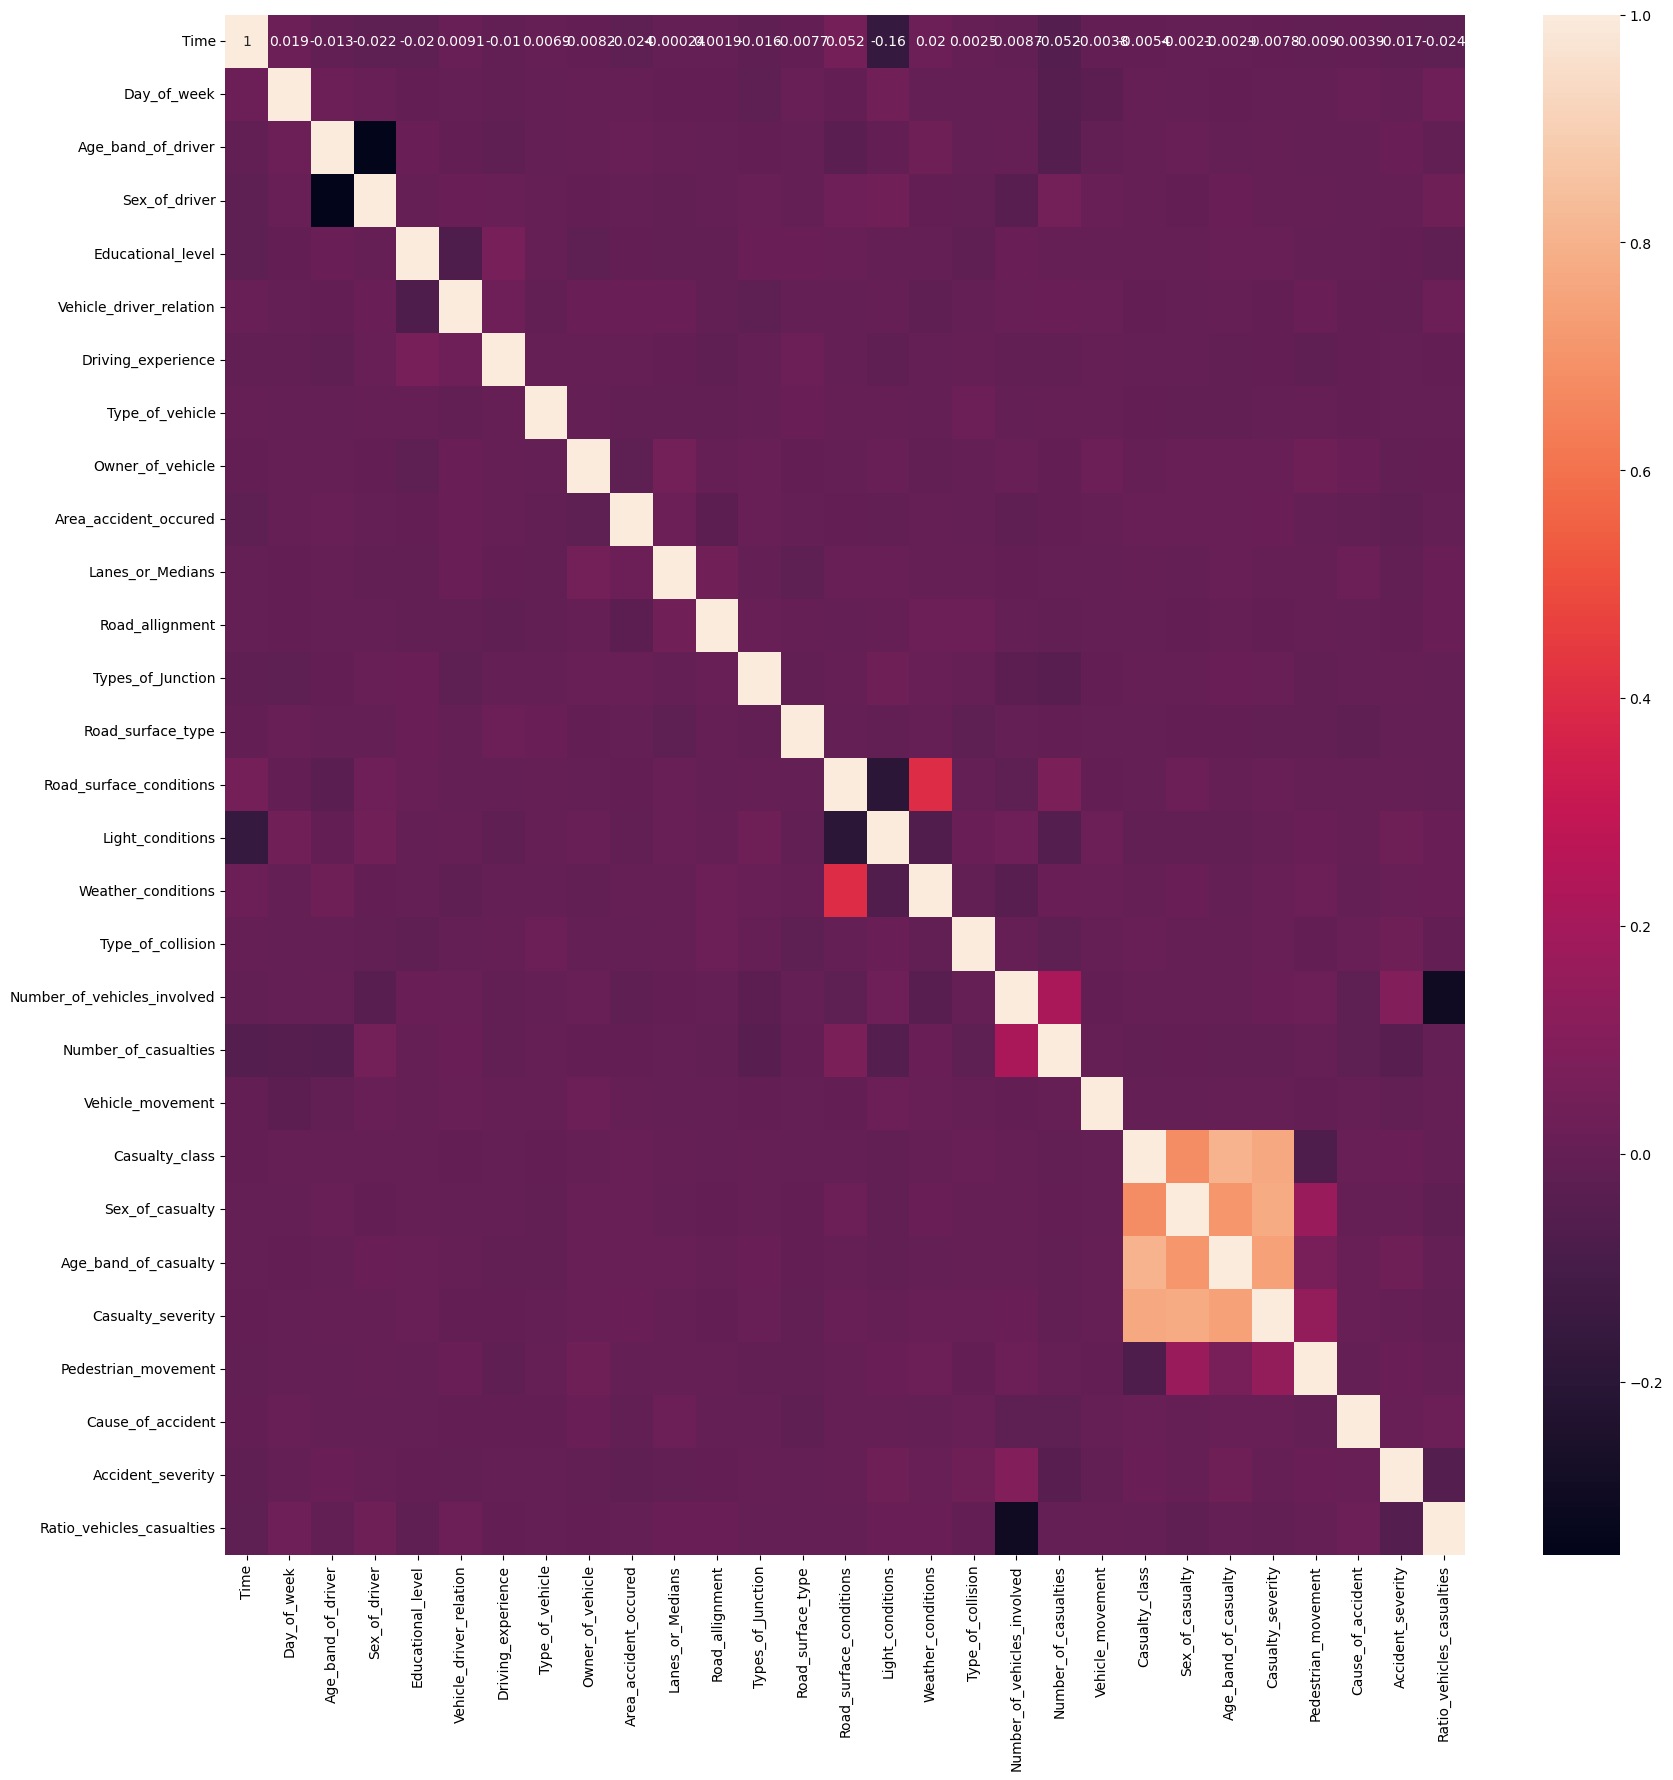

In [15]:
# Heatmap of correlation matrix of numerical data
corr_matrix = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,annot=True)
plt.show()
# As we can see from the matrix below that there is no correaltion between all numerical columns


# use Label Encoding to convert the categorical columns temporarily to numerical for correlation matrix
# Heatmap of all the data
le = LabelEncoder()
df_corr = df.copy()
for i in df_corr.select_dtypes(include=['object']).columns:
    df_corr[i] = le.fit_transform(df_corr[i])
    
corr_matrix = df_corr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)
plt.show()
# As we can see from the matrix below that the only correlation that between columns is between *Casualty_Class* & *Sex_of_Casualty* & *Age_band_of_casualty* & *Casualty_severity* and they have a positive correlation between each other

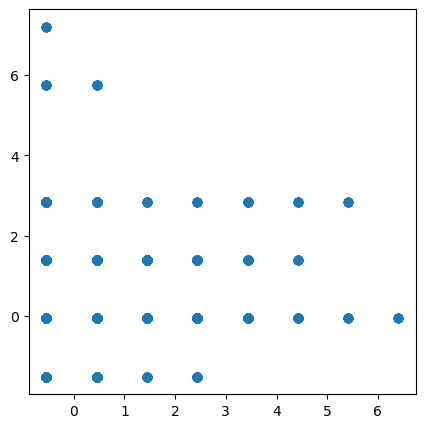

In [16]:
# Scatter plot of Number of casualties with number of vehicle involved

plt.figure(figsize=(5,5))
plt.scatter(df['Number_of_casualties'], df['Number_of_vehicles_involved'])
plt.show()

# Just want to plot it to see the 0.2 correlation between the two columns, and as we can see that it is small and we can see the linear model to the top between them

This is Line Chart for Number_of_vehicles_involved


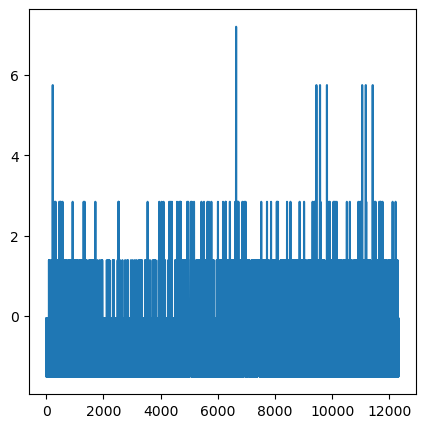

This is Line Chart for Number_of_casualties


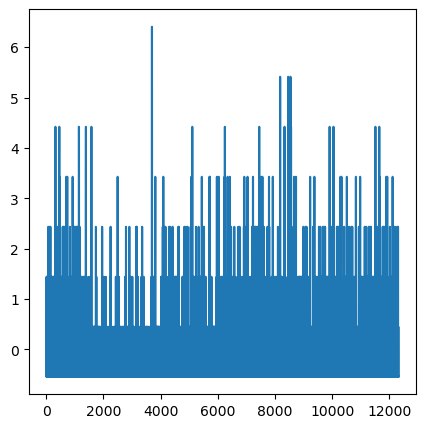

This is Line Chart for Ratio_vehicles_casualties


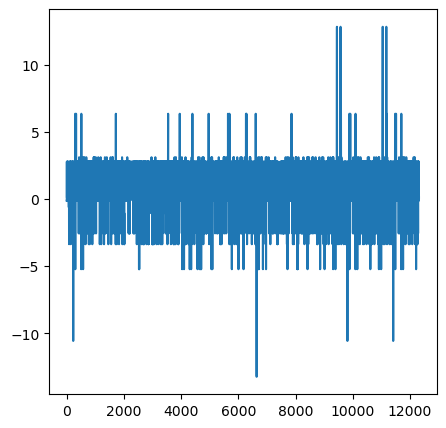

In [17]:
for i in df.select_dtypes(exclude=['object']).columns:
    print(f"This is Line Chart for {i}")
    plt.figure(figsize=(5,5))
    df[i].plot.line()
    plt.show()
    
# As we can see from the line chart that there is no good insight that we could visualize from the plots, so we are gonna try another visualization to get the distribution of the numerical data

This is Histogram Chart for Number_of_vehicles_involved


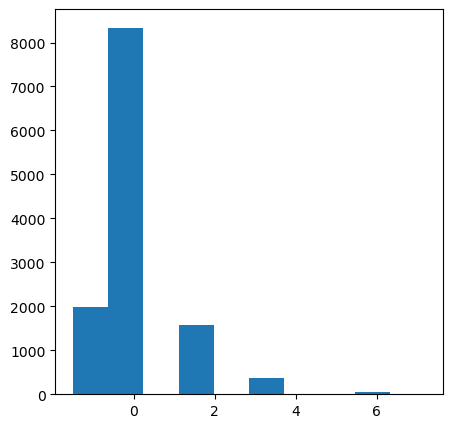

This is Histogram Chart for Number_of_casualties


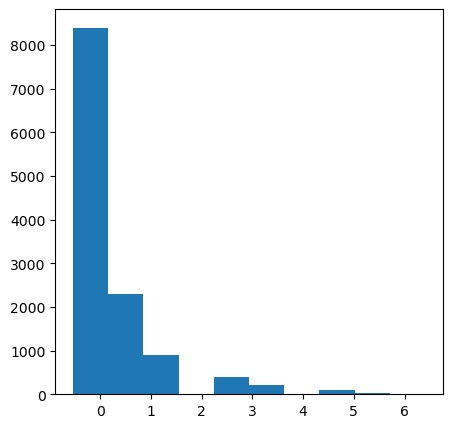

This is Histogram Chart for Ratio_vehicles_casualties


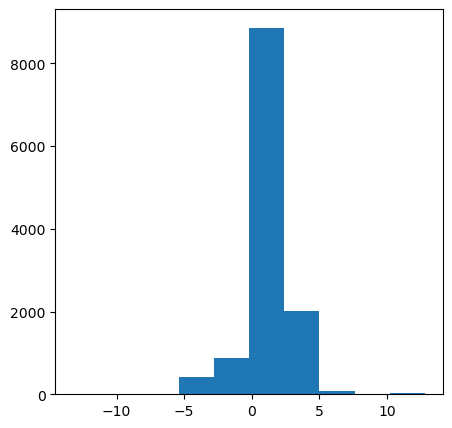

In [18]:
# Histogram of numerical data

for i in df.select_dtypes(exclude=['object']).columns:
    print(f"This is Histogram Chart for {i}")
    plt.figure(figsize=(5,5))
    plt.hist(df[i])
    # df[i].plot.histogram()
    plt.show()

# We can see the distribution of Numerical Data
# In time we can see that it is a little bit skewed to the left but not that much
# but in Number of vehicles invovled and number of casualties we can see that it is skeewed to the right a lot
# and the feature that we created *Ratio_vehicles_casualties* is almost normal distribution but in the same time a little skewed to the left

This is Box plot Chart for Number_of_vehicles_involved


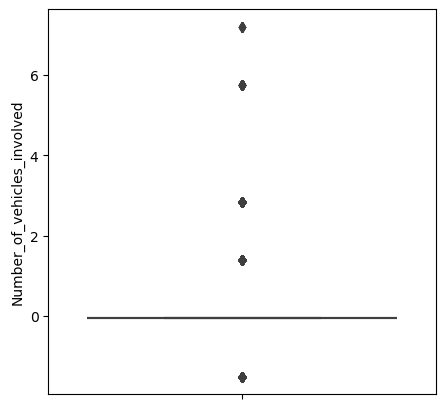

This is Box plot Chart for Number_of_casualties


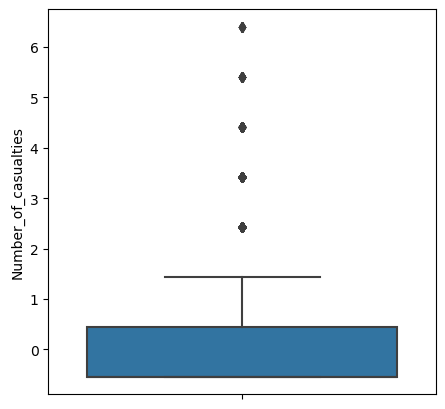

This is Box plot Chart for Ratio_vehicles_casualties


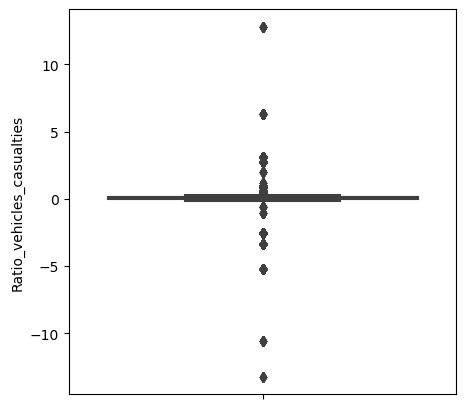

In [19]:
# Box plot of numerical data

for i in df.select_dtypes(exclude=['object','datetime']).columns:
    print(f"This is Box plot Chart for {i}")
    plt.figure(figsize=(5,5))
    sns.boxplot(y=df[i])
    plt.show()
    
# becuase the numerical values are not continuous that is why the box plot is horribale to get information from like median and IQR and the outliers

This is Pie Chart for Time


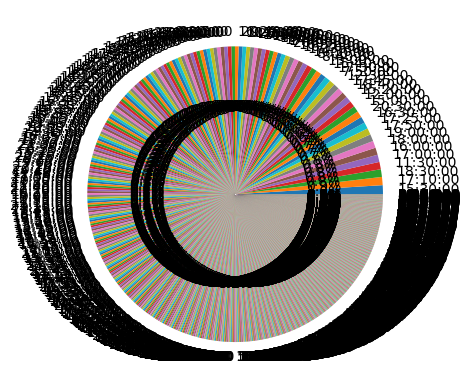

This is Pie Chart for Day_of_week


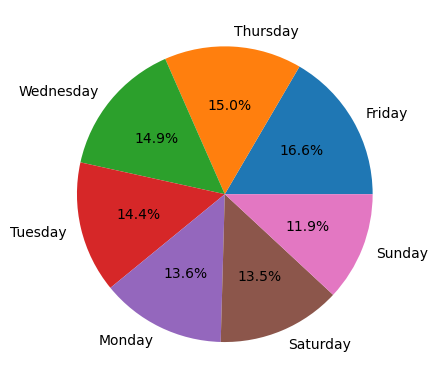

This is Pie Chart for Age_band_of_driver


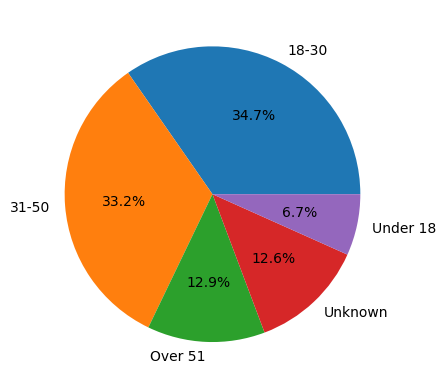

This is Pie Chart for Sex_of_driver


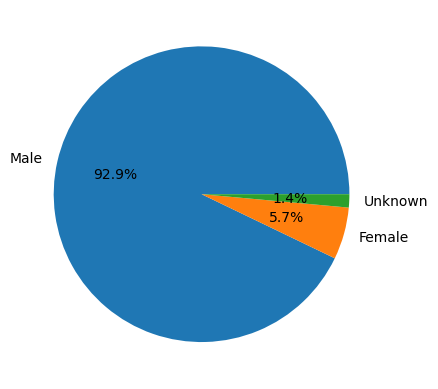

This is Pie Chart for Educational_level


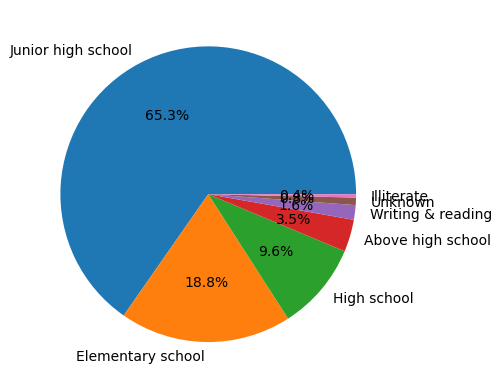

This is Pie Chart for Vehicle_driver_relation


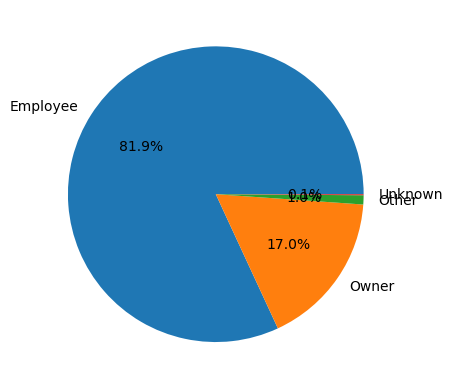

This is Pie Chart for Driving_experience


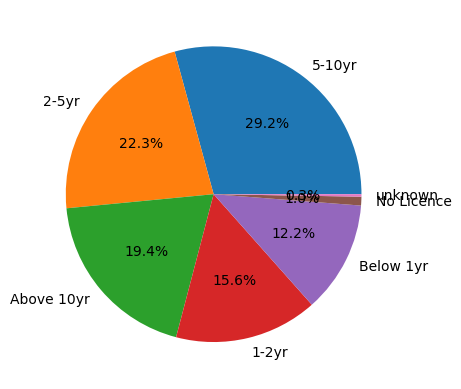

This is Pie Chart for Type_of_vehicle


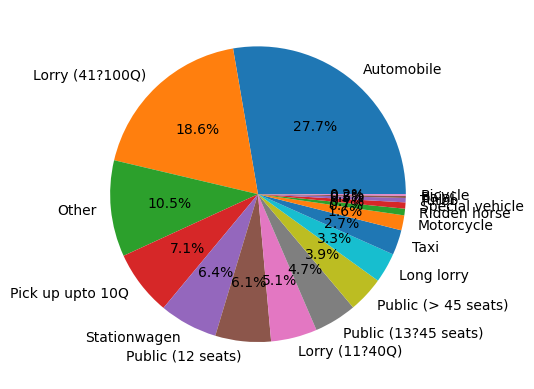

This is Pie Chart for Owner_of_vehicle


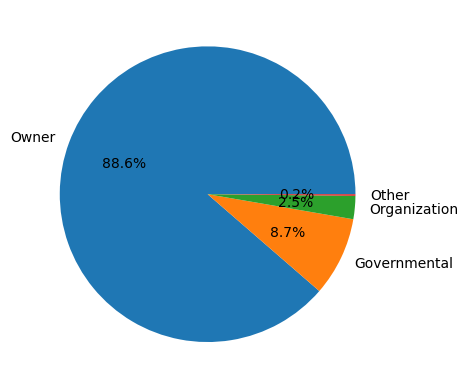

This is Pie Chart for Area_accident_occured


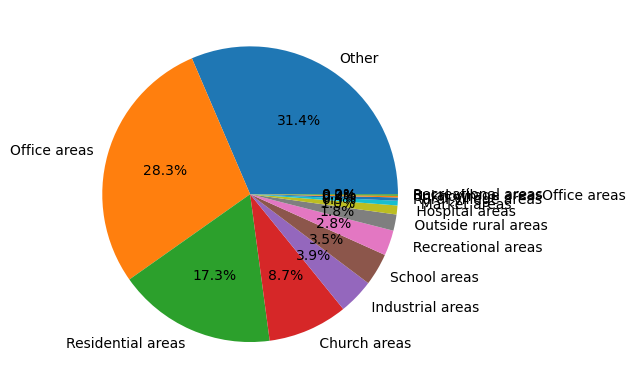

This is Pie Chart for Lanes_or_Medians


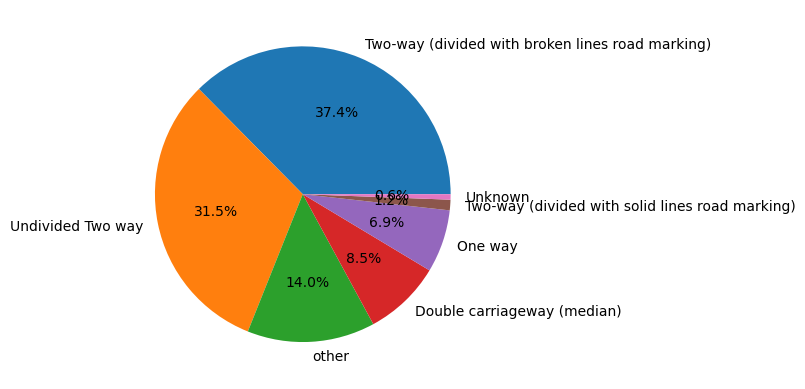

This is Pie Chart for Road_allignment


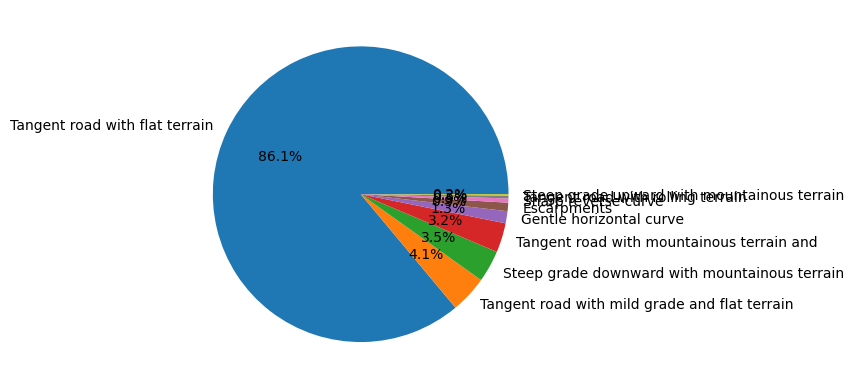

This is Pie Chart for Types_of_Junction


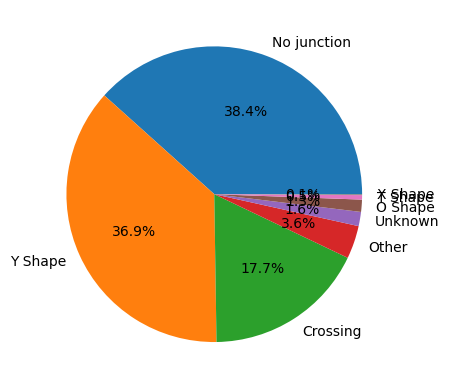

This is Pie Chart for Road_surface_type


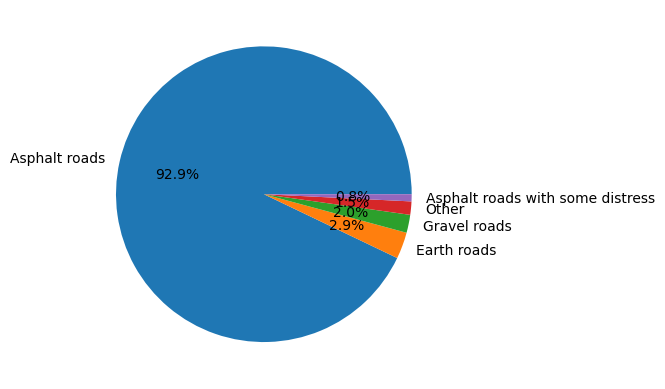

This is Pie Chart for Road_surface_conditions


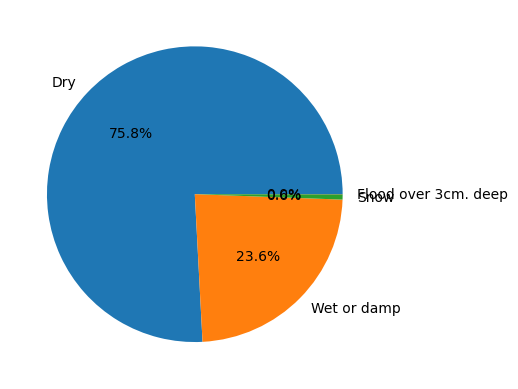

This is Pie Chart for Light_conditions


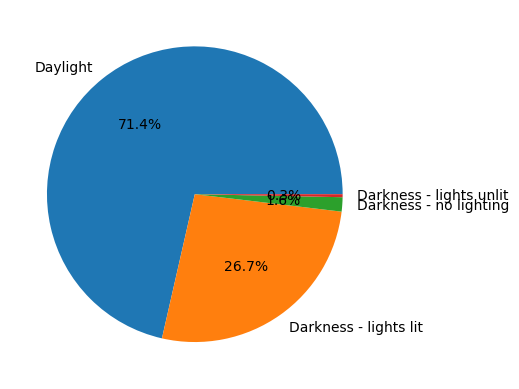

This is Pie Chart for Weather_conditions


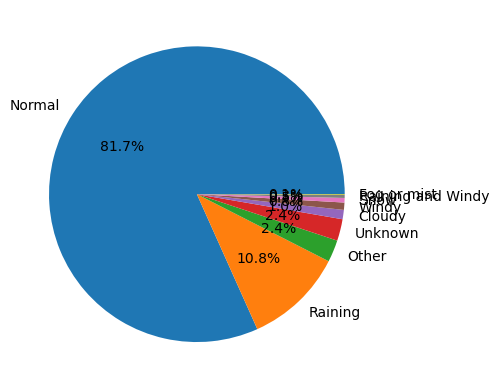

This is Pie Chart for Type_of_collision


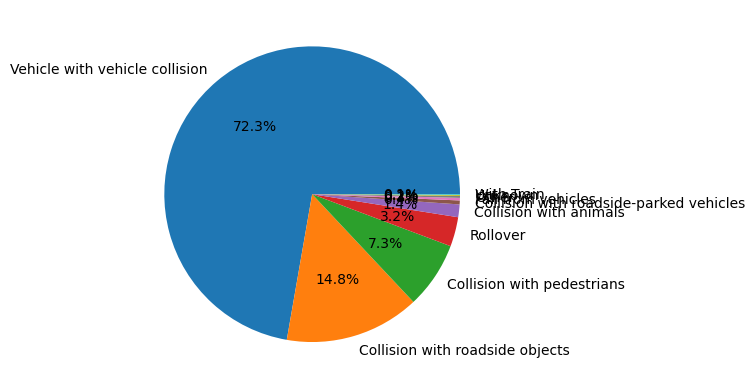

This is Pie Chart for Vehicle_movement


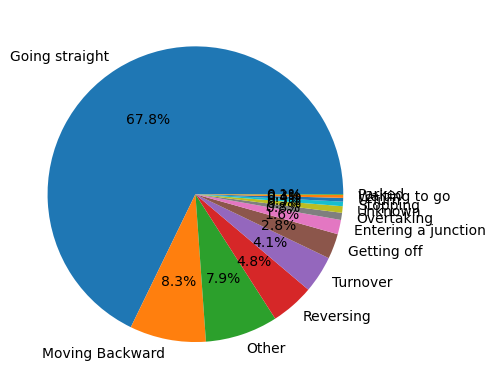

This is Pie Chart for Casualty_class


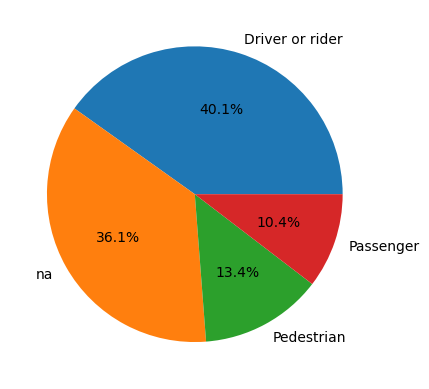

This is Pie Chart for Sex_of_casualty


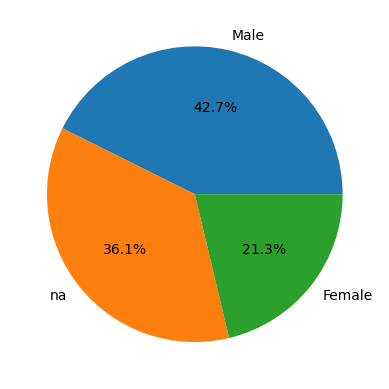

This is Pie Chart for Age_band_of_casualty


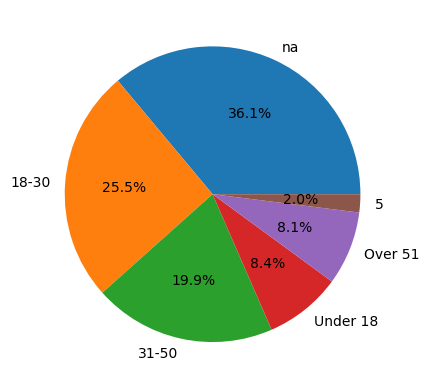

This is Pie Chart for Casualty_severity


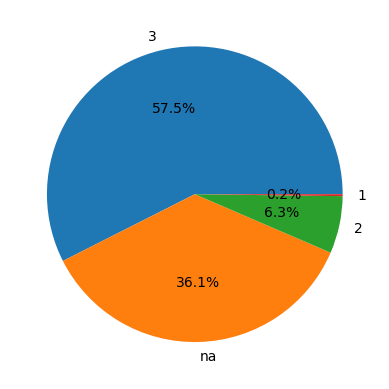

This is Pie Chart for Pedestrian_movement


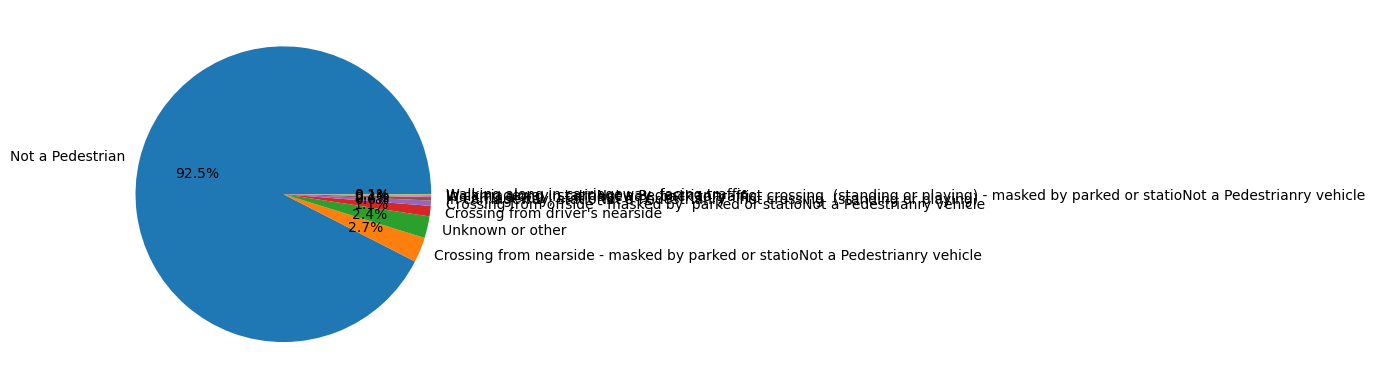

This is Pie Chart for Cause_of_accident


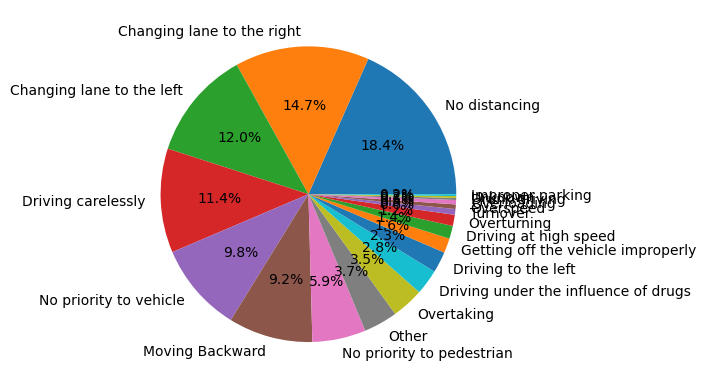

This is Pie Chart for Accident_severity


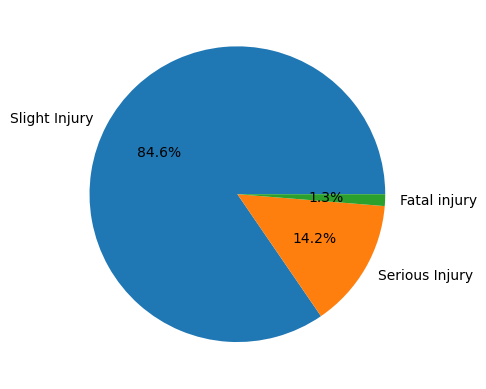

In [20]:
# Pie chart to get some information about the categorical data
for i in df.select_dtypes(include=['object']).columns:
    print(f"This is Pie Chart for {i}")
    fig, ax = plt.subplots()
    ax.pie(df[i].value_counts(), labels=df[i].value_counts().index,autopct='%1.1f%%')
    plt.show()
    
# A lot of information that could be used later, like the highest road_condition is dry condition not wet or snow. and others would be valuable, too.

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [21]:
# Importing the relevant libraries for the ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,RocCurveDisplay,auc

# We will use all the columns in our model due to having no correlation between the features and the predictor column and that's why we can't exclude any column except the time column because it's not a feature that could be used in the model due to having datetime type

In [22]:
# Choosing the features and the predictor column

X = df.drop(columns=['Accident_severity','Sex_of_driver','Road_allignment','Pedestrian_movement'],axis=1)
y = df['Accident_severity']

# Using Pipeline to make the code easy
# With column transformer we can use the numerical and categorical columns in the same time
# We make the numerical columns to be scaled but it's already scaled so it will not change anything, but if we didn't do the preprocessing before it could be useful
# For the categorical features we will use One-Hot Encoding to convert the categorical columns to numerical columns
# Then we will split the data into train and test data with 80%, 20% respectively.

numeric_features = ['Number_of_vehicles_involved', 'Number_of_casualties','Ratio_vehicles_casualties']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Time','Day_of_week', 'Age_band_of_driver','Educational_level', 'Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured','Lanes_or_Medians', 'Types_of_Junction','Road_surface_type', 'Road_surface_conditions', 'Light_conditions','Weather_conditions', 'Type_of_collision', 'Vehicle_movement','Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty','Casualty_severity', 'Cause_of_accident']

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [23]:
LR_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))]
)

LR_model.fit(X_train,y_train)
LR_y_pred = LR_model.predict(X_test)

#### Decision Tree Classifier

In [24]:
DTC_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

DTC_model.fit(X_train,y_train)
DTC_y_pred = DTC_model.predict(X_test)

#### Support Vector Machine (SVM)

In [25]:
SVC_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

SVC_model.fit(X_train,y_train)
SVC_y_pred = SVC_model.predict(X_test)

#### K-Neighbors Classifier

In [26]:
KNN_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=9))]
)

KNN_model.fit(X_train,y_train)
KNN_y_pred = KNN_model.predict(X_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

This is the model LogisticRegression
Confusion Matrix [[   2    2   33]
 [   0   26  342]
 [   2   29 2027]]
Accuracy Score 0.8343483556638246
Recall Score 0.8343483556638246
F1 Score 0.8343483556638247
Precision Score 0.8343483556638246


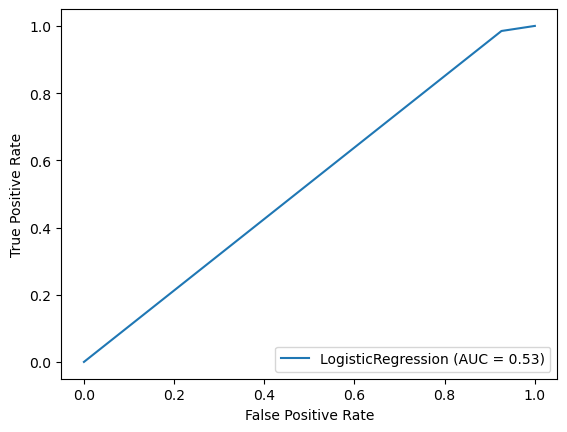




This is the model DecisionTreeClassifier
Confusion Matrix [[  19    4   14]
 [   5  164  199]
 [   9  123 1926]]
Accuracy Score 0.856272838002436
Recall Score 0.856272838002436
F1 Score 0.8562728380024359
Precision Score 0.856272838002436


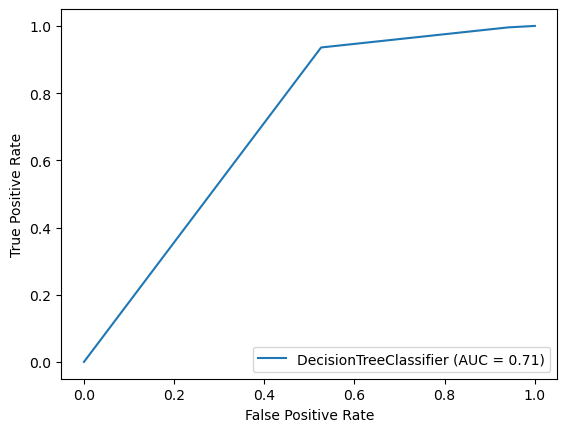




This is the model SVC
Confusion Matrix [[   0    0   37]
 [   0    4  364]
 [   0    0 2058]]
Accuracy Score 0.8371904181892001
Recall Score 0.8371904181892001
F1 Score 0.8371904181892001
Precision Score 0.8371904181892001


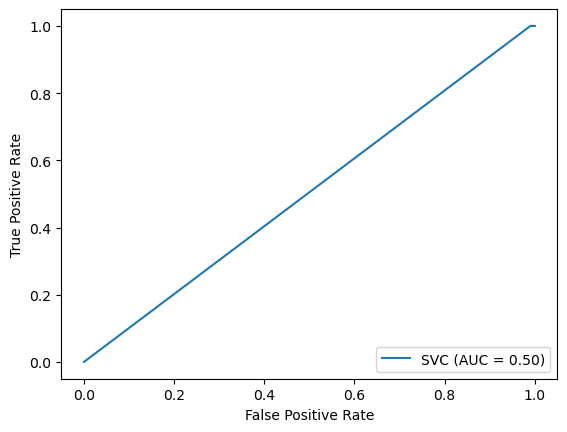




This is the model KNeighborsClassifier
Confusion Matrix [[   4    1   32]
 [   0   26  342]
 [   1   17 2040]]
Accuracy Score 0.8404384896467723
Recall Score 0.8404384896467723
F1 Score 0.8404384896467723
Precision Score 0.8404384896467723


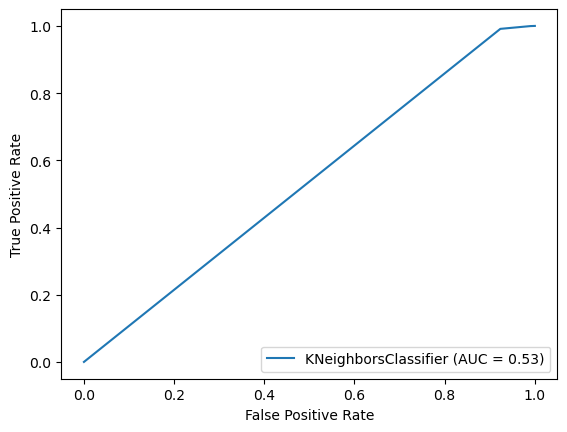

In [27]:
models_prediction = [LR_y_pred,DTC_y_pred,SVC_y_pred,KNN_y_pred]
models_name = ['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier']

# Scores need to make it numerical to be calculated that's why I used Label Encoder in y_pred of each model and y_test
le = LabelEncoder()
fitted_y_test = le.fit_transform(y_test)
    
for i in range(4):
    fitted_prediction= le.fit_transform(models_prediction[i])
    print(f"This is the model {models_name[i]}")
    print(f"Confusion Matrix {confusion_matrix(y_test,models_prediction[i])}")
    print(f"Accuracy Score {accuracy_score(y_test,models_prediction[i])}")
    print(f"Recall Score {recall_score(y_test,models_prediction[i],average='micro')}")
    print(f"F1 Score {f1_score(y_test,models_prediction[i],average='micro')}")
    print(f"Precision Score {precision_score(y_test,models_prediction[i],average='micro')}")
    fpr, tpr, thresholds = roc_curve(fitted_y_test,fitted_prediction,pos_label=2)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=models_name[i])
    display.plot()
    plt.show()
    print('\n'*2)
    
    ### roc_auc_score didn't work with me due to the multi-class problem
    # print(f"ROC & AUC Score {roc_auc_score(y_test,i,multi_class='ovr')}")



## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

#### Compare Metrix: 
- we can see that the best model with the highest metrix close to 1 is Decision Tree Classifier with Accuracy 0.853

#### Evaluate Trade-offs
- I deleted some features becuase features were biased and most of the data in them were into one sided that's why I deleted them to make the computational efficiency better and that helped in 0.6 seconds to increase the computational time and it didn't change the models results
- Choosing between the most efficient in time it would be Decision Tree Classifier and the worst would be the SVC. in the implementation it wouldn't be a different between the models

#### Justify Your Choice
- From the metrics and Trade-offs sides, we can conclude that the Decision Tree Classifier is better than the rest of the classifiers used in this dataset. In addition we can see in the ROC Curve that the best model would be the Decision Tree Classifier

#### Feature Importance
- The best feature would be Number_of_vehicle_involvev feature. It has the best positive correlation between the rest with the featured extracted from Number_of_vehicle_involved which is Ratio_vehicles_casualties.

#### Model Limitations
- It cannot accept categorical data even though the prediction would be categorical data. In addition, the models doesn't accept timeseries columns.

#### Future Improvements
- We could change different algorithms like Naive Bayes or others
- We could select the features using Lasso model
- We could clean the data using regression model like logistic regression instead of using th ffill method or mode or delete the row or the column
- We could use grid-search to find the best paramater to whatever model that we are using instead of just testing
- We could add more numerical data, so that the model would work better in prediction
- We can check the relation and depend on the relationships between the features and predictor, we can delete some features and add more instead like collecting more data for this position or others. Cannot do this in this dataset due to having just categorical data and just 2 numerical data with discrete values